# Importing the imprtant libraries and the dataset and converting it to a data frame.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(pd.read_excel(r"/content/winequality-red.xlsx"))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

# Exploring data

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### Luckily all the columns are numerical.


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

# A few missing values in a few parameters.
1. missing value in total SO<sub>2</sub>.
2. missing value in pH.
3. missing value in qulaity.
- we'll also have to check how other parameters depend onone another

In [ ]:
df[df['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [ ]:
df[df['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [ ]:
df[df['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [ ]:
# fillling the missing value
df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].mean(),inplace=True)
df['pH'].fillna(df['pH'].mean(),inplace=True)

<Axes: xlabel='quality'>

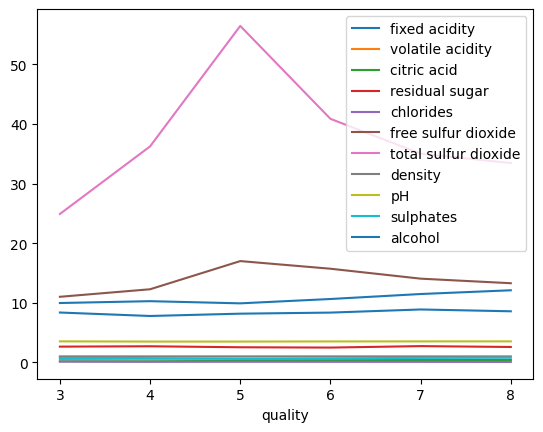

In [ ]:
#filling the missing value for quality, we'll first have to see the trends it posses with the other variables
df.groupby('quality')[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].mean().plot()

from above quality is varying most with total SO<sub>2</sub> and free SO<sub>2</sub> therefore we'll have to set a value

<Axes: xlabel='quality'>

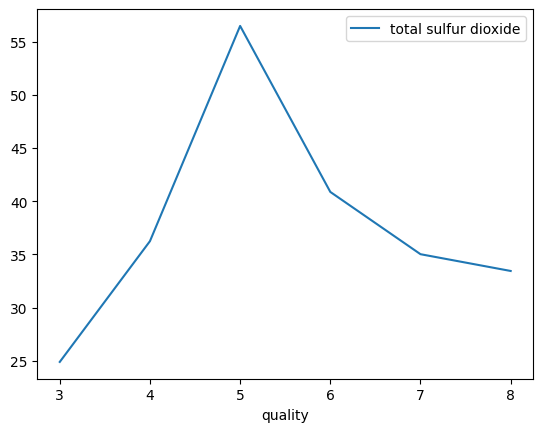

In [ ]:
df.groupby('quality')[['total sulfur dioxide']].mean().plot()

<Axes: xlabel='quality'>

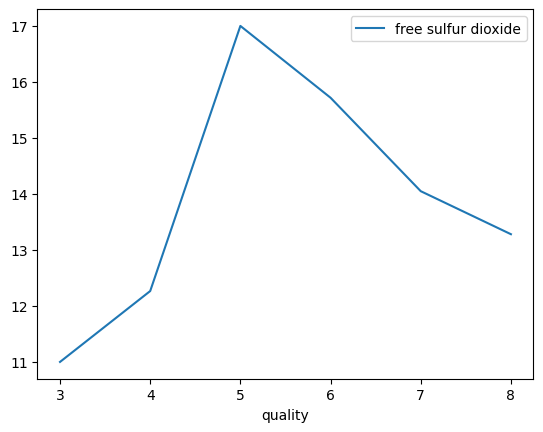

In [ ]:
df.groupby('quality')[['free sulfur dioxide']].mean().plot()

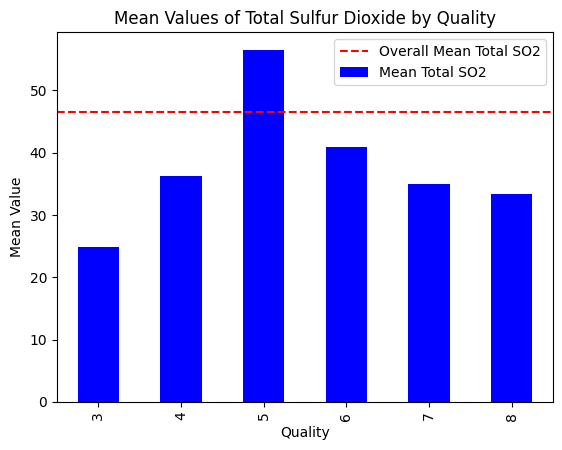

In [ ]:
# Group by 'quality' and calculate the mean for 'total sulfur dioxide'
grouped_data = df.groupby('quality')['total sulfur dioxide'].mean()
grouped_data.plot(kind='bar', color='blue', label='Mean Total SO2')
# Plotting a horizontal line for the overall mean of total sulfur dioxide
overall_mean = df['total sulfur dioxide'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean Total SO2')
plt.xlabel('Quality')
plt.ylabel('Mean Value')
plt.title('Mean Values of Total Sulfur Dioxide by Quality')
plt.legend()
plt.show()
#the same code also works for free SO2

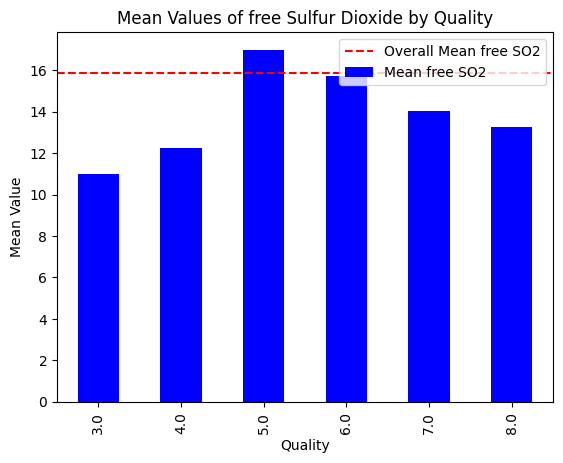

In [ ]:
grouped_data = df.groupby('quality')['free sulfur dioxide'].mean()
grouped_data.plot(kind='bar', color='blue', label='Mean free SO2')
# Plotting a horizontal line for the overall mean of total sulfur dioxide
overall_mean = df['free sulfur dioxide'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean free SO2')
plt.xlabel('Quality')
plt.ylabel('Mean Value')
plt.title('Mean Values of free Sulfur Dioxide by Quality')
plt.legend()
plt.show()

from above plots we derive the range of values for filling the nan.

In [ ]:
df[df['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


free SO<sub>2</sub> = 11.0

total SO<sub>2</sub> = 34.0

We introduce a new variable that is average of both free and total SO<sub>2</sub>, to judge which bucket the missing value of the quality might lie.

In [ ]:
df['avg total so2 and free so2']=(df['total sulfur dioxide']+df['free sulfur dioxide'])/2
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,avg total so2 and free so2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,22.5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,46.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,34.5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,38.5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0,38.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,45.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0,34.5
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0,38.0


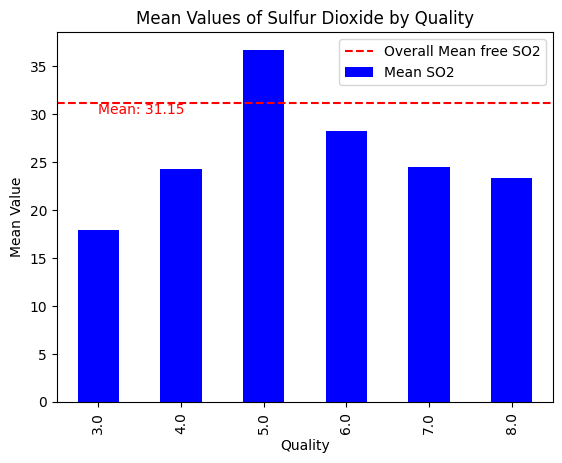

In [ ]:
grouped_data = df.groupby('quality')['avg total so2 and free so2'].mean()
grouped_data.plot(kind='bar', color='blue', label='Mean SO2')
# Plotting a horizontal line for the overall mean of total sulfur dioxide
overall_mean = df['avg total so2 and free so2'].mean()
plt.axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean free SO2')
plt.text(0, overall_mean, f'Mean: {overall_mean:.2f}', color='red', verticalalignment='top')
plt.xlabel('Quality')
plt.ylabel('Mean Value')
plt.title('Mean Values of Sulfur Dioxide by Quality')
plt.legend()
plt.show()

form the above graph the missing qaulity is ~8, as the free SO<sub>2</sub> + total SO<sub>2</sub>/2 = 22.5 and closest to mean value for "8" quality metric.

In [ ]:
df['quality'].fillna(8,inplace=True)

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

the dataset has been cleared of all the missing values

In [ ]:
import plotly.express as ps
fig1=ps.histogram(['pH'])
fig2=ps.box(df['pH'])
fig1.show()
fig2.show()
print(df['pH'].median())

3.52


In [ ]:
fig=ps.histogram(df['total sulfur dioxide'])
fig.show()

the median value of pH is 3.52

In [ ]:
fig1=ps.histogram(df['quality'])
fig2 = ps.box(df['quality'])
fig1.show()
fig2.show()

Quality is exphibiting different values over the dataset, we'll have to check in which bin does the missing value lie, and bad quality wine > good quality wine.

In [ ]:
df.drop('avg total so2 and free so2',axis=1,inplace=True)

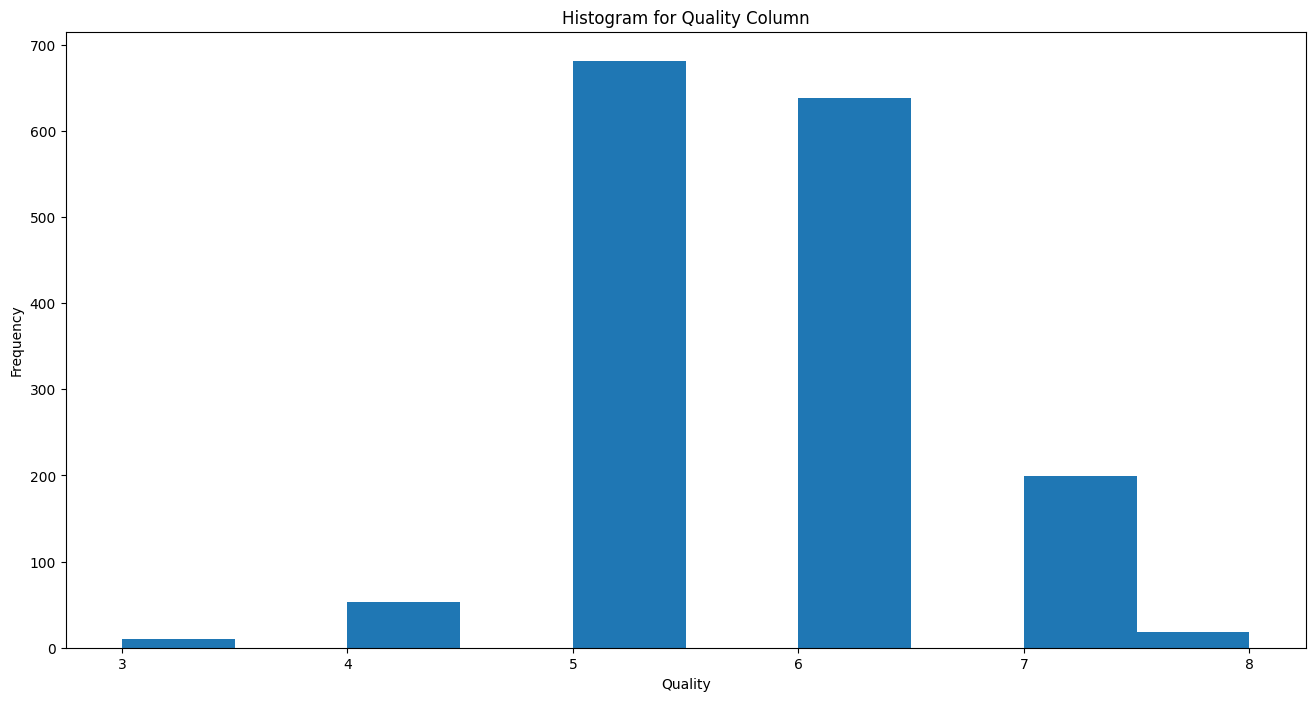

In [ ]:
# @title ANALYZING THE DATA
plt.figure(figsize=(16,8))
plt.hist(df["quality"])
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Histogram for Quality Column")
plt.show()

In [ ]:
# @title Selection
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
325,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.52,0.69,9.2,6.0
707,7.4,0.49,0.19,3.0,0.077,16.0,37.0,0.99660,3.52,0.51,10.5,5.0
143,6.3,0.39,0.08,1.7,0.066,3.0,20.0,0.99540,3.34,0.58,9.4,5.0
630,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.52,0.60,9.3,6.0
882,8.4,0.31,0.29,3.1,0.194,14.0,26.0,0.99536,3.52,0.78,12.0,6.0
280,11.4,0.26,0.44,3.6,0.071,6.0,19.0,0.99860,3.52,0.82,9.3,6.0
1529,7.1,0.69,0.08,2.1,0.063,42.0,52.0,0.99608,3.52,0.60,10.2,6.0
333,8.4,0.56,0.08,2.1,0.105,16.0,44.0,0.99580,3.52,0.52,11.0,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
271,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.52,0.97,10.1,6.0


# determining the x and y and scaling them.

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# @title Splitting Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=7)
#we scle the splited datasets to see how the mdoels might react.
scale=StandardScaler()
scale.fit_transform(x_train)
scale.transform(x_test)

array([[-0.87602976, -0.31752652, -0.9867009 , ..., -0.05991245,
        -0.05278865, -0.76656753],
       [ 1.41057794, -0.70846273,  0.70715586, ..., -1.47960431,
         0.06371881, -1.04796822],
       [-0.70453418, -1.43448712,  1.68240672, ...,  0.45633914,
         0.35498746,  0.17143475],
       ...,
       [-0.53303861, -0.87600682,  0.80981384, ...,  0.1336819 ,
         0.12197254, -0.67276731],
       [ 1.18191717, -1.37863909,  1.37443276, ..., -0.38256969,
        -0.16929611, -0.86036776],
       [-0.01855187,  1.30206635,  0.09120795, ...,  0.90805927,
         0.12197254,  1.0156368 ]])

In [ ]:
# @title Result
mode1_res=pd.DataFrame(columns=['model','score'])


# linear regressor.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score #mean arithmatic percentage error = mape.
def metrics(y_true,y_pred):
    print(f'RMSE: ',mean_squared_error(y_true,y_pred)**0.5)
    print(f'R_sqrd vlaue: ', r2_score(y_true,y_pred))
def accuracy(y_true,y_pred):
    error=abs(y_true-y_pred)
    mape=100*np.mean(error/y_true)
    accuracy=100-mape
    return accuracy

In [ ]:
from sklearn.linear_model import LinearRegression
model5=LinearRegression()
predictor=model5.fit(x_train,y_train)
y_pred=predictor.predict(x_test)


In [ ]:
metrics(y_test,y_pred)

RMSE:  0.5577858076390143
R_sqrd vlaue:  0.3032280479039636


In [ ]:
accuracy(y_test,y_pred)

92.04982782200449

In [ ]:
mode1_res.loc[len(mode1_res)]=['linear regressor',(accuracy(y_test,y_pred)/100)]
mode1_res

,model,score
0,linear regressor,0.920498


In [ ]:
# @title knn
from sklearn.neighbors import KNeighborsClassifier
mode11=KNeighborsClassifier(n_neighbors=3)
mode11.fit(x_train,y_train)
y_pred=mode11.predict(x_test)

from  sklearn.metrics import accuracy_score
#accuracy score
mode1_res.loc[len(mode1_res)]=['KNN',accuracy_score(y_test,y_pred)]
mode1_res



,model,score
0,KNN,0.5375


In [ ]:
# @title Decision tree
from sklearn.tree import DecisionTreeClassifier
mode12=DecisionTreeClassifier(criterion='entropy',random_state=7)
mode12.fit(x_train,y_train)
y_pred=mode12.predict(x_test)

from  sklearn.metrics import accuracy_score
#accuracy score
mode1_res.loc[len(mode1_res)]=['DecissionTreeClassifier',accuracy_score(y_test,y_pred)]
mode1_res


,model,score
0,KNN,0.53750
1,DecissionTreeClassifier,0.65625


In [ ]:
# @title GaussianNB
from sklearn.naive_bayes import GaussianNB
mode13=GaussianNB()
mode13.fit(x_train,y_train)
y_pred=mode13.predict(x_test)

from  sklearn.metrics import accuracy_score
#accuracy score
mode1_res.loc[len(mode1_res)]=['GaussianNB',accuracy_score(y_test,y_pred)]
mode1_res


,model,score
0,KNN,0.53750
1,DecissionTreeClassifier,0.65625
2,GaussianNB,0.53750


In [ ]:
# @title xgboost
import xgboost as xb
model4=xb.XGBClassifier(random_state=1)
y_train = y_train.map({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5})
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)

from  sklearn.metrics import accuracy_score
#accuracy score
mode1_res.loc[len(mode1_res)]=['xgboost',accuracy_score(y_test,y_pred)]
mode1_res



,model,score
0,KNN,0.53750
1,DecissionTreeClassifier,0.65625
2,GaussianNB,0.53750
3,xgboost,0.00000


In [ ]:
print("max accuracy")
x=mode1_res['score'][mode1_res['score'].idxmax()]
mode1_res['model'][mode1_res['score']==x]

max accuracy


1    DecissionTreeClassifier
Name: model, dtype: object

# hence linear regressor will be used to predcit as it gives an accuracy of 92%

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
import pandas as pd

num_rows = int(input("Enter the number of samples for which you want to predict quality: "))
column_data = {}

for column_name in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']:
    values = input(f'Enter values for {column_name}: ').split()
    values = [float(val) for val in values[:num_rows]]  # Convert each value to float
    column_data[column_name] = values

# Create a DataFrame from the user inputs
user_df = pd.DataFrame(column_data)
# Assuming model5 is a trained model, predict on user input data

pred_quality=model5.predict(user_df)
pred_quality_int=np.ceil(pred_quality)
print(int(pred_quality_int))


Enter the number of samples for which you want to predict quality: 1
Enter values for fixed acidity: 7.8
Enter values for volatile acidity: 0.88
Enter values for citric acid: 0
Enter values for residual sugar: 2.6
Enter values for chlorides: 0.098
Enter values for free sulfur dioxide: 25
Enter values for total sulfur dioxide: 34
Enter values for density: 0.9968
Enter values for pH: 3.2
Enter values for sulphates: 0.68
Enter values for alcohol: 9.8
6


<ipython-input-19-b407861552d1>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(pred_quality_int))
